<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cropland-Mapping-with-Random-Forests-and-Neural-Networks" data-toc-modified-id="Cropland-Mapping-with-Random-Forests-and-Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cropland Mapping with Random Forests and Neural Networks</a></span><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Introduction</a></span></li><li><span><a href="#2.-Objectives-of-this-machine-learning-exercise" data-toc-modified-id="2.-Objectives-of-this-machine-learning-exercise-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Objectives of this machine learning exercise</a></span></li><li><span><a href="#3.-The-dataset" data-toc-modified-id="3.-The-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. The dataset</a></span></li><li><span><a href="#Creating-New-Environment-may-be-needed" data-toc-modified-id="Creating-New-Environment-may-be-needed-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating New Environment may be needed</a></span></li><li><span><a href="#4.1.-Importing-required-libraries" data-toc-modified-id="4.1.-Importing-required-libraries-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>4.1. Importing required libraries</a></span><ul class="toc-item"><li><span><a href="#4.3.-Importing-the-dataset" data-toc-modified-id="4.3.-Importing-the-dataset-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>4.3. Importing the dataset</a></span></li></ul></li><li><span><a href="#5.-Exploratory-data-analysis-and-preprocessing" data-toc-modified-id="5.-Exploratory-data-analysis-and-preprocessing-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>5. Exploratory data analysis and preprocessing</a></span><ul class="toc-item"><li><span><a href="#5.1.-Correlation" data-toc-modified-id="5.1.-Correlation-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>5.1. Correlation</a></span></li><li><span><a href="#5.3.-Creating-train-and-test-sets" data-toc-modified-id="5.3.-Creating-train-and-test-sets-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>5.3. Creating train and test sets</a></span></li><li><span><a href="#5.4.-Feature-scaling" data-toc-modified-id="5.4.-Feature-scaling-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>5.4. Feature scaling</a></span></li></ul></li><li><span><a href="#6.-Machine-Learning" data-toc-modified-id="6.-Machine-Learning-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>6. Machine Learning</a></span><ul class="toc-item"><li><span><a href="#6.2.-Deep-Learning-(Artificial-Neural-Network)" data-toc-modified-id="6.2.-Deep-Learning-(Artificial-Neural-Network)-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>6.2. Deep Learning (Artificial Neural Network)</a></span><ul class="toc-item"><li><span><a href="#6.2.1.-Model-definition" data-toc-modified-id="6.2.1.-Model-definition-1.7.1.1"><span class="toc-item-num">1.7.1.1&nbsp;&nbsp;</span>6.2.1. Model definition</a></span></li><li><span><a href="#6.2.2.-Model-fitting" data-toc-modified-id="6.2.2.-Model-fitting-1.7.1.2"><span class="toc-item-num">1.7.1.2&nbsp;&nbsp;</span>6.2.2. Model fitting</a></span></li><li><span><a href="#6.2.3.-Predictions" data-toc-modified-id="6.2.3.-Predictions-1.7.1.3"><span class="toc-item-num">1.7.1.3&nbsp;&nbsp;</span>6.2.3. Predictions</a></span></li></ul></li></ul></li><li><span><a href="#7.-Classification-performance" data-toc-modified-id="7.-Classification-performance-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>7. Classification performance</a></span></li></ul></li></ul></div>

# Cropland Mapping with Random Forests and Neural Networks

<p style="text-align: justify">This case study is based on the "<b>Crop mapping using fused optical-radar dataset</b>", created by <a href="http://i-khosravi.ir/">Dr. Iman Khosravi</a> (Department of Remote Sensing & GIS, Faculty of Geography, University of Tehran, Iran) and donated to the <b>University of California, Irvine (UCI) Machine Learning Repository</b> (<a href="https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set">here</a>), where it is currently hosted.

## 1. Introduction

Crop maps play an important role in various applications such as crop inventories, crop insurance, yield estimation and the enforcement of quota limits.

The dataset serving as the basis for this machine learning study, described in detail in Section 3, contains a large set of numerical features derived from remote sensing information assembled by two primary sources:</p>
<ul>
    <li style="text-align: justify">Optical information (actual images) was collected by RapidEye satellites;</li>
    <li style="text-align: justify">Radar-based information was collected by an Unihnabitated Aerial Vehicle Synthetic Aperture Radar (UAVSAR) system.</li>
</ul>
<p style="text-align: justify">As the amount and complexity of data gathered from such different sources over several time spans is inherently huge, <b>machine learning</b> plays a central role when it comes to the final classification purpose.


<img src="https://i.imgur.com/4oTGmTA.png" width="500" height="500">

## 2. Objectives of this machine learning exercise

<p style="text-align: justify">Two major objectives are proposed for this study:</p>
<ol>
    <li style="text-align: justify">Assess the performance of scikit-learn's Random Forest Classifier;</li>
    <li style="text-align: justify">Investigate potential performance improvements that may be offered by an Artificial Neural Network (ANN).</li>
</ol>

## 3. The dataset

<p style="text-align: justify">The dataset chosen for this machine learning exercise contains fused, bi-temporal optical-radar data for cropland classification, in tabular form, derived from images collected by RapidEye satellites (optical) and polarimetric radar information collected by Unmanned Aerial Vehicle Synthetic Aperture Radars (UAVSAR) over an agricultural region near <b>Winnipeg, Canada</b> on <b>July 5th and July 14th, 2012</b>. In this area, seven different crop cultures existed at the time of collection:</p>
<ol>
    <li style="text-align: justify">Corn</li>
    <li style="text-align: justify">Pea</li>
    <li style="text-align: justify">Canola</li>
    <li style="text-align: justify">Soy</li>
    <li style="text-align: justify">Oat</li>
    <li style="text-align: justify">Wheat</li>
    <li style="text-align: justify">Broadleaf</li>
</ol>

<img src="https://i.imgur.com/KAaR1oa.png" width="800" height="800">

<p style="text-align: justify">The dataset has 325,834 observations, each containing 175 attributes structured the following way:</p>
<p><b>Dependent variable</b>:</p>
<ul>
    <li style="text-align: justify">Crop class, as described above ('label', integer value ranging from 1 to 7);</li>
</ul>
<p><b>Predictive features</b>:</p>
<ul>
    <li style="text-align: justify">Polarimetric radar features (49) collected on July 5th, 2012 ('f1' to 'f49', real values);</li>
    <li style="text-align: justify">Polarimetric radar features (49) collected on July 14th, 2012 ('f50' to 'f98', real values);</li>
    <li style="text-align: justify">Optical features (38) collected on July 5th, 2012 ('f99' to 'f136', real values);</li>
    <li style="text-align: justify">Optical features (38) collected on July 14th, 2012 ('f137' to 'f174', real values).</li>
</ul>
<p style="text-align: justify">There are no missing values.</p>

## Creating New Environment may be needed


In [1]:
# Run this in terminal line by line
# Create and activate a new virtual environment
# python -m venv myenv
# source myenv/bin/activate  # On Windows use `myenv\Scripts\activate`

# Upgrade pip
# pip install --upgrade pip

# Install Jupyter and necessary packages
# pip install jupyter tensorflow pandas scikit-learn ipykernel

# Add the virtual environment to Jupyter
# python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Launch Jupyter Notebook
# jupyter notebook

## 4.1. Importing required libraries

In [2]:
#!pip install keras

In [3]:
#!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

### 4.3. Importing the dataset

<p style="text-align: justify">The dataset containing 325,834 observations is imported and shuffled.</p> Preventing Order Bias: Datasets often have some inherent order, such as time-series data or grouped data. If this order is preserved, models may learn spurious patterns or relationships that are not generalizable.

In [6]:
# Importing the dataset
dataset = pd.read_csv('/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/data/WinnipegDataset.txt')
dataset = dataset.sample(frac=1)

## 5. Exploratory data analysis and preprocessing

<p style="text-align: justify">A glimpse at the dataset structure confirms observation shuffling.</p>

In [7]:
dataset

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
82308,3,-12.5400,-22.421,-14.5690,-16.354,-12.9910,-16.385,2.02890,-9.8806,-7.8516,...,0.18519,0.141990,4.00000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
122328,4,-13.7230,-22.387,-15.1010,-17.399,-13.7530,-17.270,1.37810,-8.6639,-7.2859,...,0.16049,0.661440,2.22220,0.172840,0.83333,0.33333,0.33333,1.00270,0.48148,0.53452
267235,6,-19.4500,-28.696,-16.7730,-21.237,-17.2990,-21.206,-2.67660,-9.2455,-11.9220,...,0.43210,-0.250000,6.00000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
295986,6,-17.2120,-26.251,-16.6480,-20.978,-15.6890,-20.947,-0.56401,-9.0391,-9.6031,...,0.28395,0.158110,1.44440,0.246910,0.83333,0.33333,0.33333,0.93689,0.43210,0.39528
260299,6,-16.8080,-26.942,-16.2590,-19.901,-15.7760,-20.061,-0.54918,-10.1330,-10.6830,...,0.38272,-0.530330,2.00000,0.000000,0.94444,0.11111,0.11111,0.34883,0.80247,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225283,5,-16.0160,-25.753,-17.6190,-20.780,-15.2420,-21.724,1.60210,-9.7364,-8.1343,...,0.13580,-0.178820,2.00000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
15812,1,-9.5279,-17.672,-8.3884,-11.518,-8.8477,-11.389,-1.13950,-8.1441,-9.2836,...,0.23457,0.494970,0.11111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
254751,6,-17.9100,-26.473,-18.8870,-20.478,-17.9860,-21.873,0.97730,-8.5631,-7.5858,...,1.00000,1.000000,2.00000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
42133,2,-9.7935,-15.519,-9.4247,-13.325,-8.2823,-12.834,-0.36884,-5.7259,-6.0947,...,0.25926,0.670820,2.00000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000


<p style="text-align: justify">In addition, the analysis of unique labels shows a somehow balanced distribution (class share percentages mapped and charted below), with the exception of '<b>broadleaf</b>' and '<b>pea</b>'.

In [8]:
class_share = pd.Series(100 * dataset.label.value_counts(normalize=True)).sort_index()
print('Class share\n')
for i in range(0,7):
    print(f'Class {class_share.index[i]}: {class_share.iloc[i]:.2f} %')

Class share

Class 1: 12.02 %
Class 2: 1.10 %
Class 3: 23.22 %
Class 4: 22.73 %
Class 5: 14.46 %
Class 6: 26.11 %
Class 7: 0.35 %


Text(0, 0.5, 'Share (%)')

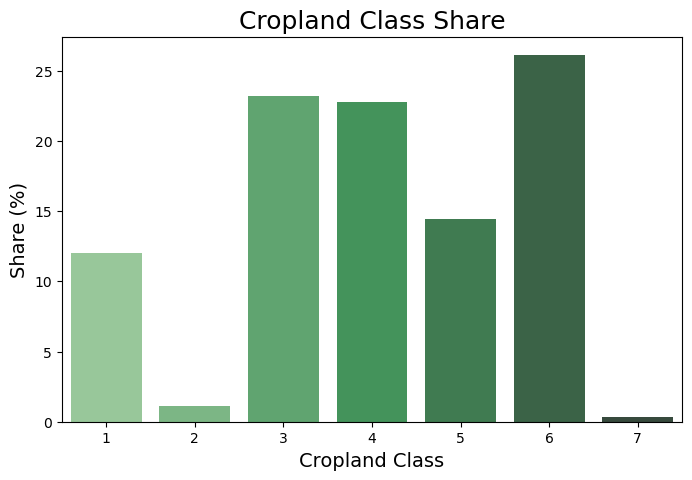

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(ax=ax, x = class_share.index, y = class_share, palette='Greens_d')
plt.title('Cropland Class Share', fontsize=18)
plt.xlabel('Cropland Class', fontsize=14)
plt.ylabel('Share (%)', fontsize=14)

### 5.1. Correlation

A threshold of 0.95 has been arbitrarily defined for filtering highly intercorrelated features.</p>

In [10]:
correlation_matrix = dataset.corr().abs()
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify highly correlated features to drop
highly_correlated_features_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.95)]

# Drop the highly correlated features from the dataset
dataset = dataset.drop(columns=highly_correlated_features_to_drop)

print(f'Number of features to drop: {len(highly_correlated_features_to_drop)}')
print(f'Features to drop: {highly_correlated_features_to_drop}')


Number of features to drop: 72
Features to drop: ['f2', 'f5', 'f6', 'f13', 'f15', 'f16', 'f17', 'f18', 'f30', 'f32', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f45', 'f46', 'f47', 'f49', 'f53', 'f54', 'f55', 'f62', 'f64', 'f65', 'f66', 'f67', 'f79', 'f81', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f92', 'f94', 'f95', 'f96', 'f98', 'f102', 'f108', 'f109', 'f111', 'f112', 'f113', 'f114', 'f116', 'f117', 'f120', 'f121', 'f127', 'f129', 'f133', 'f135', 'f146', 'f147', 'f148', 'f149', 'f152', 'f153', 'f154', 'f156', 'f157', 'f158', 'f159', 'f165', 'f171', 'f173']


In [11]:
dataset.shape

(325834, 103)

### 5.3. Creating train and test sets

In [12]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0:1]

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')

Training features shape: (260667, 102)
Testing features shape: (65167, 102)
Training target shape: (260667, 1)
Testing target shape: (65167, 1)


<p style="text-align: justify">In preparation for testing at the end of this exercise, mapping class counts in the set of testing labels is important:</p>

In [14]:
class_count = pd.Series(y_test.label.value_counts()).sort_index()
print('Class count - Test labels\n')
for i in range(0,7):
    print(f'Class {class_count.index[i]}: {class_count.iloc[i]}')

Class count - Test labels

Class 1: 7892
Class 2: 742
Class 3: 15316
Class 4: 14654
Class 5: 9466
Class 6: 16882
Class 7: 215


For the <b>neural network</b> classification, the label column will be one-hot encoded with the help of Pandas' get_dummies method. Therefore, labels will now consist of arrays with seven binary elements, each of them referring to a specific crop class, allowing for the final class identification based on the array element with the highest predicted value.</li>

In [15]:
y_train_ann = pd.get_dummies(y_train.label).values
y_test_ann = pd.get_dummies(y_test.label).values

### 5.4. Feature scaling

In [16]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Machine Learning

<p style="text-align: justify"></p>

### 6.2. Deep Learning (Artificial Neural Network)

#### 6.2.1. Model definition

<p style="text-align: justify">The artificial neural network (ANN) architecture comprises a sequential structure with:</p>
<ul>
    <li>one input layer (102 input nodes);</li>
    <li>three hidden layers (204, 204 and 102 nodes, respectively);</li>
    <li>one seven-node output layer.</li>
</ul>
<p style="text-align: justify">As features are standardized real numbers, '<b>relu</b>' is elected as the activation function of choice for hidden layers. 

<img src="https://i.imgur.com/XcKIjmy.png" width="600" height="600">

In [17]:
# ANN
ann_classifier = Sequential()

# Input layer and first dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu', input_dim = 102))
ann_classifier.add(Dropout(0.1))

# Second dense layer
ann_classifier.add(Dense(units = 204, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Third dense layer
ann_classifier.add(Dense(units = 102, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dropout(0.1))

# Output layer
ann_classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

# Model compilation

optim = Adam(learning_rate=0.0005)

ann_classifier.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
ann_train_history = ann_classifier.fit(X_train, y_train_ann, batch_size = 32, epochs = 30, verbose=0)

#### 6.2.2. Model fitting

<p style="text-align: justify">Training accuracy and loss per training epoch are charted below.</p>
<p style="text-align: justify">As we are dealing with hundreds of thousands of observations, it is not unusual to see a neural network model converging fast. In this case, batches contain 64 observations. In every epoch the model will be exposed to more than 5,000 different batches. Few epochs may suffice to lead to high accuracy, low loss levels already in the beginning of the training session.</p>

#### 6.2.3. Predictions

<p style="text-align: justify">After fitting the model to the training set, predictions are generated for the testing set. As a reminder, each prediction will correspond to an array with seven elements, each of them referring to one particular crop class. The final array is '<b>binarized</b>': the array element with the highest value will be converted to '1' while all other array elements will be converted to '0'.</p>

In [19]:
y_pred_ann = ann_classifier.predict(X_test)
for i in range(len(y_pred_ann)):
    for j in range(7):
        if y_pred_ann[i][j] == y_pred_ann[i].max():
            y_pred_ann[i][j] = 1
        else:
            y_pred_ann[i][j] = 0
y_pred_ann = y_pred_ann.astype(int)

2037/2037 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step


<p style="text-align: justify">A new sanity check reveals that the first prediction in the 'y_pred_ann' tensor matches the array generated for the first test set label - the class has been correctly predicted for this particular observation with our neural network.</p>

In [20]:
print(f'Predicted: {y_pred_ann[0]}')
print(f'Actual: {y_test_ann[0]}')

Predicted: [0 0 1 0 0 0 0]
Actual: [False False  True False False False False]


## 7. Classification performance

Performance is herein evaluated with both statistical metrics and confusion matrices. As a reminder, in confusion matrices:</p>
<ul>
    <li>Columns correspond to <b>predicted</b> classes;</li>
    <li>Rows correspond to <b>actual</b> classes.</li>

In [21]:
ann_cm = np.zeros((7,7))

In [22]:
ann_pred_correct = 0
ann_pred_incorrect = 0
for i in range(len(y_test_ann)):
    if y_pred_ann[i].sum() > 0:
        ann_index_test = np.where(y_test_ann[i] == 1)[0][0]
        ann_index_pred = np.where(y_pred_ann[i] == 1)[0][0]
        ann_cm[ann_index_test][ann_index_pred] += 1
        if ann_index_test == ann_index_pred:
            ann_pred_correct += 1
        else:
            ann_pred_incorrect += 1


In [23]:
ann_cmatrix = pd.DataFrame(ann_cm.astype(int),
                           index = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'],
                           columns = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'])
ann_cmatrix

,Corn,Pea,Canola,Soy,Oat,Wheat,Broadleaf
Corn,7867,0,2,9,5,1,8
Pea,0,742,0,0,0,0,0
Canola,1,1,15297,2,8,7,0
Soy,3,0,4,14635,8,4,0
Oat,2,0,2,7,9439,16,0
Wheat,1,0,2,4,24,16848,3
Broadleaf,0,0,0,0,1,1,213


In [24]:
ann_accuracy = accuracy_score(y_test_ann, y_pred_ann)
ann_precision, ann_recall, ann_f_score, ann_support = precision_recall_fscore_support(y_test_ann, y_pred_ann, average='macro')
print(f'Accuracy: {ann_accuracy * 100:.2f} %')
print(f'Precision: {ann_precision * 100:.2f} %')
print(f'Recall: {ann_recall * 100:.2f} %')
print(f'F-Score: {ann_f_score * 100:.2f} %')

Accuracy: 99.81 %
Precision: 99.14 %
Recall: 99.72 %
F-Score: 99.42 %


In [25]:
print('Accuracy per class\n')
for i in range(len(ann_cmatrix)):
    class_accuracy = ann_cmatrix.iloc[i,i] / ann_cmatrix.sum(axis=0)[i]
    print(f'{ann_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Corn: 99.91 %
Pea: 99.87 %
Canola: 99.93 %
Soy: 99.85 %
Oat: 99.52 %
Wheat: 99.83 %
Broadleaf: 95.09 %
